In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/AmesHousing.csv')

print(df.shape)
print(df.columns)
print(df.head())


(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

In [ ]:
df = df.drop(columns=['Order', 'PID'])

In [ ]:
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.3].index
df = df.drop(columns=cols_to_drop)

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

In [5]:
# Impute categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [7]:
# Separate features and target
X = df.drop(columns=['SalePrice']).values
y = df['SalePrice'].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2930, 242)
Shape of y: (2930, 1)


In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [ ]:
from utils.train_test_split import train_test_split_custom

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2344, 242)
Shape of X_test: (586, 242)
Shape of y_train: (2344, 1)
Shape of y_test: (586, 1)


In [ ]:
from utils.scaler import StandardScaler 

scaler = StandardScaler()
print(type(X_train)) 
print(X_train[:5])     

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("Mean of X_train (after standardization):", X_train_std.mean(axis=0))
print("Std of X_train (after standardization):", X_train_std.std(axis=0))

<class 'numpy.ndarray'>
[[70 68.0 5100 ... False True False]
 [160 21.0 1890 ... False True False]
 [60 62.0 7162 ... False True False]
 [20 60.0 8070 ... False True False]
 [30 50.0 7000 ... False True False]]
Mean of X_train (after standardization): [ 1.87610640e-16 -5.89687571e-17  2.73056132e-17 -6.77785473e-17
  5.16083194e-16 -6.78638033e-16  3.74823418e-15  3.18289195e-17
  2.13341385e-16 -2.48568704e-16  3.15920972e-17 -1.64780969e-16
 -1.05551707e-16  1.57913121e-16  1.55935655e-16 -7.75119445e-17
 -1.08180435e-16  4.71181683e-16  2.99059223e-16  3.29372479e-16
  1.63975773e-16  7.26807693e-17  2.56383841e-16  9.35921799e-17
 -1.05016488e-15 -1.24000165e-16 -7.38885631e-17  4.81222949e-17
 -5.16272652e-17  1.23100241e-16 -2.59734877e-16 -1.91873442e-16
  3.57175419e-16 -8.97828929e-16 -4.41436800e-17 -8.33243220e-14
  6.62072312e-16  1.34988721e-18 -7.24584523e-16  9.03856057e-16
  4.36795082e-16  1.75437973e-16  3.13351449e-16 -5.65863246e-16
  2.11955974e-16 -8.23668020e-17 

In [11]:
X_train_std_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_test_std_b = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]


Epoch 0: Loss = 35649024500.9148
Epoch 100: Loss = 1236494800.8719
Epoch 200: Loss = 639832127.0274
Epoch 300: Loss = 608977706.1289
Epoch 400: Loss = 596046087.0812
Epoch 500: Loss = 587134346.4265
Epoch 600: Loss = 580348816.4184
Epoch 700: Loss = 574871932.5282
Epoch 800: Loss = 570265789.1664
Epoch 900: Loss = 566272315.0246


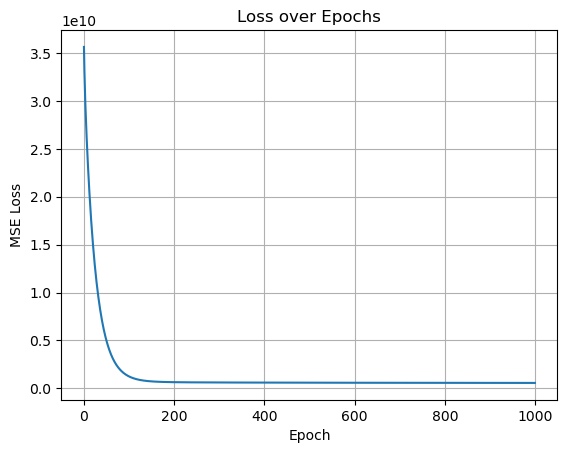

Train R²: 0.9142
Test R²: 0.8905


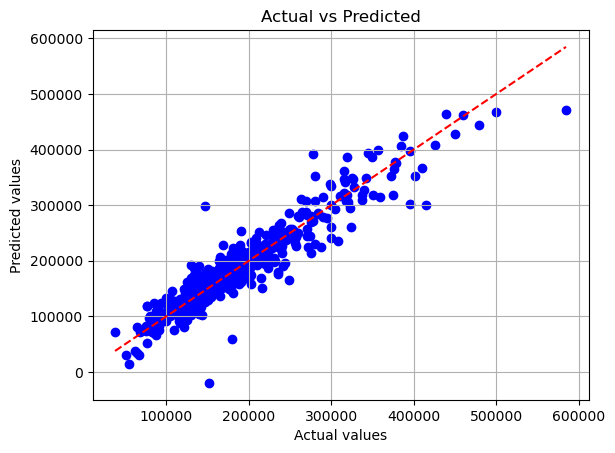

In [12]:
import importlib
import ml_algorithms.linear_regression
importlib.reload(ml_algorithms.linear_regression)

from ml_algorithms.linear_regression import MultipleLinearRegression

baseline_model = MultipleLinearRegression()
baseline_model.fit(X_train_std_b, y_train, learning_rate=0.01, epochs=1000)

train_r2 = baseline_model.r2_score(X_train_std_b, y_train)
test_r2 = baseline_model.r2_score(X_test_std_b, y_test)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

baseline_model.plot_predictions(X_test_std_b, y_test)


Epoch 0: Ridge Loss = 38989806663.3948
Epoch 100: Ridge Loss = 23152096219.8619
Epoch 200: Ridge Loss = 15653188359.6748
Epoch 300: Ridge Loss = 10706958838.5205
Epoch 400: Ridge Loss = 7403407077.2349
Epoch 500: Ridge Loss = 5189821959.3195
Epoch 600: Ridge Loss = 3704505309.3221
Epoch 700: Ridge Loss = 2706839068.0637
Epoch 800: Ridge Loss = 2036009020.0654
Epoch 900: Ridge Loss = 1584361594.7568
Epoch 1000: Ridge Loss = 1279777113.8212
Epoch 1100: Ridge Loss = 1073919351.0966
Epoch 1200: Ridge Loss = 934380990.4315
Epoch 1300: Ridge Loss = 839427189.0574
Epoch 1400: Ridge Loss = 774475774.6794
Epoch 1500: Ridge Loss = 729739473.7370
Epoch 1600: Ridge Loss = 698646126.6952
Epoch 1700: Ridge Loss = 676779953.6058
Epoch 1800: Ridge Loss = 661171876.1766
Epoch 1900: Ridge Loss = 649823722.7910


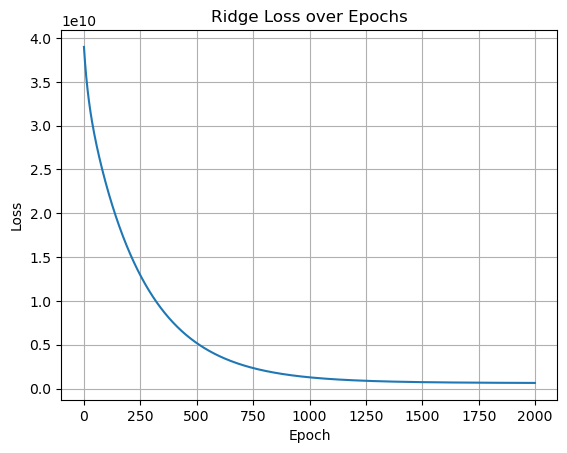

Ridge Train R²: 0.9022
Ridge Test R²: 0.8898


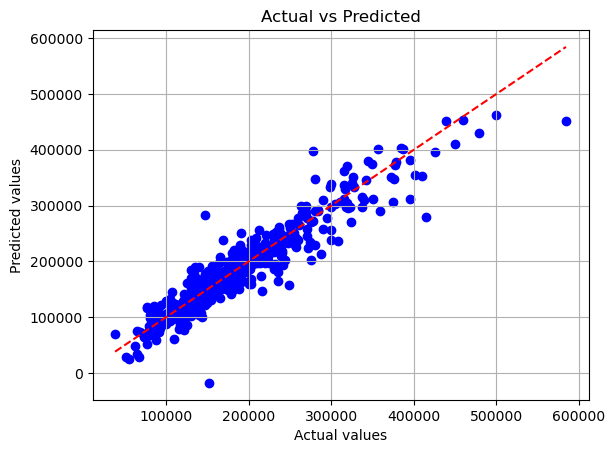

In [13]:
from ml_algorithms.linear_regression import RidgeRegression  # ✅ Import Ridge

ridge_model = RidgeRegression(lr=0.001, n_iters=2000, lambda_=0.1)
ridge_model.fit(X_train_std_b, y_train)

ridge_train_r2 = ridge_model.r2_score(X_train_std_b, y_train)
ridge_test_r2 = ridge_model.r2_score(X_test_std_b, y_test)

print(f"Ridge Train R²: {ridge_train_r2:.4f}")
print(f"Ridge Test R²: {ridge_test_r2:.4f}")

ridge_model.plot_predictions(X_test_std_b, y_test)


Epoch 0: Lasso Loss = 38989806651.3162
Epoch 100: Lasso Loss = 23152077772.1419
Epoch 200: Lasso Loss = 15653163490.4782
Epoch 300: Lasso Loss = 10706929777.3185
Epoch 400: Lasso Loss = 7403374675.4054
Epoch 500: Lasso Loss = 5189786667.1207
Epoch 600: Lasso Loss = 3704467449.8183
Epoch 700: Lasso Loss = 2706798904.9641
Epoch 800: Lasso Loss = 2035966775.4919
Epoch 900: Lasso Loss = 1584317456.2739
Epoch 1000: Lasso Loss = 1279731239.4086
Epoch 1100: Lasso Loss = 1073871873.6016
Epoch 1200: Lasso Loss = 934332021.6984
Epoch 1300: Lasso Loss = 839376823.4877
Epoch 1400: Lasso Loss = 774424092.2876
Epoch 1500: Lasso Loss = 729686542.7165
Epoch 1600: Lasso Loss = 698592005.5420
Epoch 1700: Lasso Loss = 676724692.8202
Epoch 1800: Lasso Loss = 661115519.6888
Epoch 1900: Lasso Loss = 649766309.0873


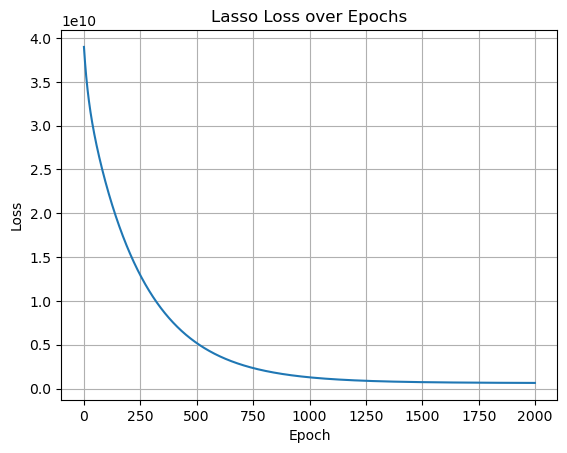

Lasso Train R²: 0.9022
Lasso Test R²: 0.8898


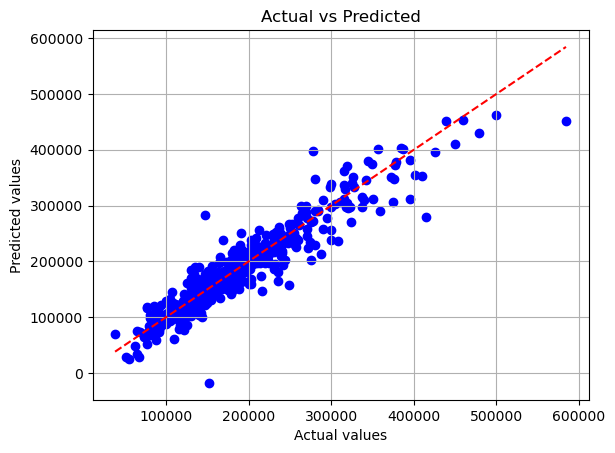

In [14]:
from ml_algorithms.linear_regression import LassoRegression  # ✅ Import Lasso

lasso_model = LassoRegression(lr=0.001, n_iters=2000, lambda_=0.1)
lasso_model.fit(X_train_std_b, y_train)

lasso_train_r2 = lasso_model.r2_score(X_train_std_b, y_train)
lasso_test_r2 = lasso_model.r2_score(X_test_std_b, y_test)

print(f"Lasso Train R²: {lasso_train_r2:.4f}")
print(f"Lasso Test R²: {lasso_test_r2:.4f}")

lasso_model.plot_predictions(X_test_std_b, y_test)


## Impact of Regularization on Model Performance

### **Before Regularization (Linear Regression)**
- **Train R²**: 0.9142
- **Test R²**: 0.8905

The **Train R²** of 0.9142 indicates that the model fits the training data well. However, the **Test R²** of 0.8905 is lower, which suggests that the model doesn't generalize as well to unseen data. The relatively small difference (0.0237) suggests that the model could be **slightly overfitting** the training data.

### **After Regularization (Ridge Regression)**
- **Train R²**: 0.9022
- **Test R²**: 0.8898

After applying regularization, the **Train R²** decreased slightly to 0.9022, and the **Test R²** remained quite close at 0.8898. The **difference** between Train and Test R² has decreased from **0.0237 to 0.0124**. This indicates that the regularization has helped in **reducing overfitting** and improving the model's ability to generalize to unseen data.

### **After Regularization (Lasso Regression)**
- **Train R²**: 0.9022
- **Test R²**: 0.8898

The **Train R²** and **Test R²** after applying **Lasso Regression** are identical to Ridge. The decrease in **Train R²** is similar, and the **Test R²** remains almost the same. This confirms that **Lasso** regularization, like Ridge, also reduces overfitting and ensures better generalization.

### **Difference Between Train and Test R²**
- **Before Regularization**:
  - Difference = **0.0237**
  - A relatively small difference suggests that the model fit the training data well but showed slight overfitting.

- **After Regularization (Ridge & Lasso)**:
  - Difference = **0.0124**
  - The reduced difference shows that regularization has improved the model's generalization and reduced overfitting.

### **Conclusion**
Regularization techniques like **Ridge regression** and **Lasso regression** help prevent overfitting by reducing the complexity of the model. In this case, the application of regularization led to a smaller gap between the Train and Test R² scores, indicating better generalization to new, unseen data. The comparison between **Ridge** and **Lasso** demonstrates that both methods have a similar impact on performance, with **regularization** being the key factor that helps improve generalization and reduce overfitting.
